<a href="https://colab.research.google.com/github/gdnsjf/educational-work/blob/main/classification_and_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Используя Линейную регрессию Логистическую регрессию SVM укажите зависимость роста (player_height) от веса (player_weight) для уникальных игроков всех команд по всем сезонам. Постройте визуализацию используя библиотеки Matplotlib / Seaborn. По каждому из методов выведите оценку score модели.

Линейная регрессия Score: 0.6581704658645413
Логистическая регрессия Score: 0.6754563894523327
SVM Score: 0.655269405567747


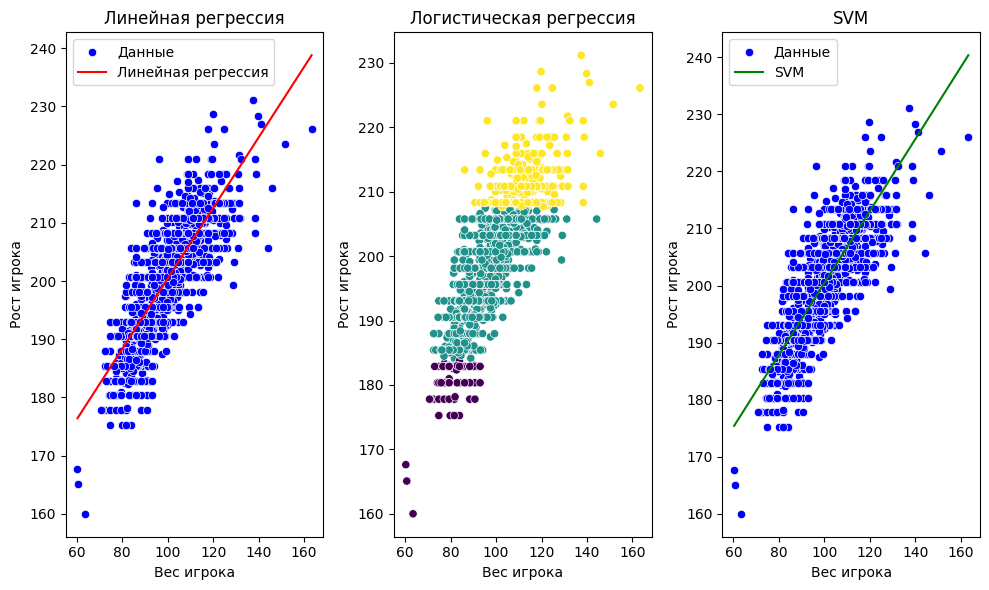

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler

# Загрузка датасета
df = pd.read_csv('dataset.csv')

# Очистка данных от дубликатов
data = df[['player_name','player_weight','player_height']].drop_duplicates(subset='player_name',keep='first')
# Усредненние данных дубликатов
data = df[['player_name','player_weight','player_height']].groupby('player_name').mean()

# Выделение признаков и целевой переменной
X = data[['player_weight']]
y = data['player_height']

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Линейная регрессия
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
lin_reg_score = lin_reg.score(X_test_scaled, y_test)
print("Линейная регрессия Score:", lin_reg_score)

# Логистическая регрессия (для целевой переменной нужно создать категории)
y_train_cat = pd.cut(y_train, bins=3, labels=False)
y_test_cat = pd.cut(y_test, bins=3, labels=False)
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train_cat)
log_reg_score = log_reg.score(X_test_scaled, y_test_cat)
print("Логистическая регрессия Score:", log_reg_score)

# SVM
svm_reg = SVR(kernel='linear')
svm_reg.fit(X_train_scaled, y_train)
svm_reg_score = svm_reg.score(X_test_scaled, y_test)
print("SVM Score:", svm_reg_score)

svm = SVR(kernel='linear')
svm.fit(X_train, y_train)
svm_score = svm.score(X_test, y_test)

# Визуализация
plt.figure(figsize=(10, 6))

# Визуализация линейной регрессии
plt.subplot(1, 3, 1)
sns.scatterplot(x=X_train['player_weight'], y=y_train, color='blue', label='Данные')
sns.lineplot(x=X_train['player_weight'], y=lin_reg.predict(X_train_scaled), color='red', label='Линейная регрессия')
plt.title('Линейная регрессия')
plt.xlabel('Вес игрока')
plt.ylabel('Рост игрока')

# Визуализация логистической регрессии
plt.subplot(1, 3, 2)
sns.scatterplot(x=X_train['player_weight'], y=y_train, hue=y_train_cat, palette='viridis', legend=False)
plt.title('Логистическая регрессия')
plt.xlabel('Вес игрока')
plt.ylabel('Рост игрока')

# Визуализация SVM
plt.subplot(1, 3, 3)
sns.scatterplot(x=X_train['player_weight'], y=y_train, color='blue', label='Данные')
sns.lineplot(x=X_train['player_weight'], y=svm_reg.predict(X_train_scaled), color='green', label='SVM')
plt.title('SVM')
plt.xlabel('Вес игрока')
plt.ylabel('Рост игрока')

plt.tight_layout()
plt.show()

Используя алгоритм Дерева Принятия Решения попробуйте определить название команды (team_abbreviation) как целевое значение функции (Y) за сезон 2010-11 от следующих атрибутов (Х.) Среднее pts всех игроков команды за сезон Среднее reb всех игроков команды за сезон Среднее ast всех игроков команды за сезон Среднее player_height всех игроков команды за сезон Среднее player_width всех игроков команды за сезон

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import io
import pydotplus
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
# Загрузка датасета
data = pd.read_csv('dataset.csv', sep=',')

# Фильтрация данных для сезона 2010-11
data = data[data['season'] == '2010-11']
columns = ['team_abbreviation','pts', 'reb', 'ast', 'player_height', 'player_weight']

# Создание признаков (Х) и целевой переменной (Y)
X = data[['pts', 'reb', 'ast', 'player_height', 'player_weight']]
y = data['team_abbreviation']

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели дерева принятия решений
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Предсказание названия команды
y_pred = tree_clf.predict(X_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print("Точность модели Дерева Принятия Решений:", accuracy)

# Экспорт дерева решений в формат Graphviz
dot_data = export_graphviz(tree_clf, out_file=None, feature_names=X.columns, class_names=y.unique(), filled=True)

# Создание графа из данных Graphviz
graph = pydotplus.graph_from_dot_data(dot_data)

# Сохранение графа в виде изображения PNG
graph.write_png('decision_tree.png')

# Отображение изображения дерева решений
Image('decision_tree.png')

Точность модели Дерева Принятия Решений: 0.01098901098901099
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.827972 to fit



Используя ваш личный выбор атрибутов на предложенном датасете постройте классификацию данных по любому (любым) атрибутам-признакам (в том числе можете построить новый вычисляемый атрибут-признак)

Точность модели: 1.0
              precision    recall  f1-score   support

      Center       1.00      1.00      1.00       179
  Non-Center       1.00      1.00      1.00       314

    accuracy                           1.00       493
   macro avg       1.00      1.00      1.00       493
weighted avg       1.00      1.00      1.00       493



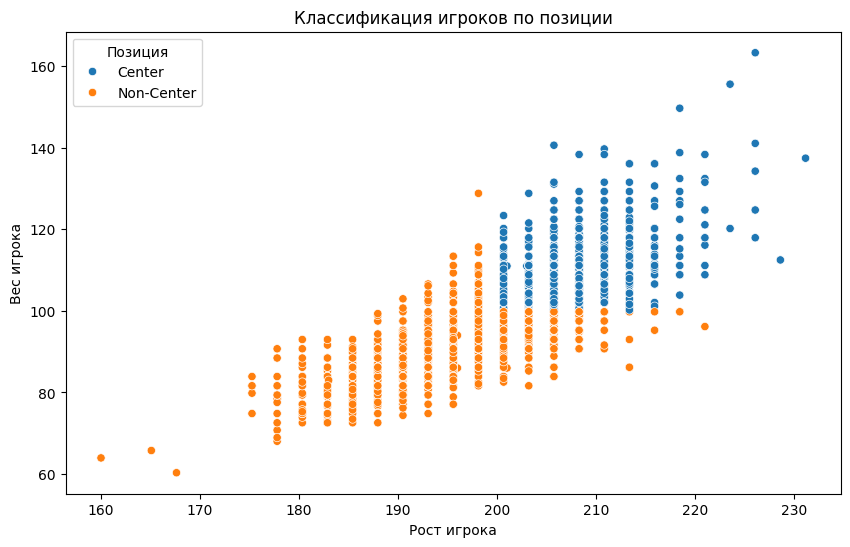

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Загрузка данных
data = pd.read_csv('dataset.csv')

# Очистка данных от дубликатов
data = data[['player_name','player_weight','player_height']].drop_duplicates(subset='player_name',keep='first')
# Усредненние данных дубликатов
data = data[['player_name','player_weight','player_height']].groupby('player_name').mean()

# Создание нового атрибута-признака "Позиция"
data['position'] = data.apply(lambda row: 'Center' if row['player_height'] > 200 and row['player_weight'] > 100 else 'Non-Center', axis=1)

# Выделение признаков (Х) и целевой переменной (Y)
X = data[['player_height', 'player_weight']]
y = data['position']

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели дерева принятия решений
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Предсказание позиции игроков
y_pred = tree_clf.predict(X_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print("Точность модели:", accuracy)

# Отчет о классификации
print(classification_report(y_test, y_pred))

# Визуализация классификации
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='player_height', y='player_weight', hue='position')
plt.title('Классификация игроков по позиции')
plt.xlabel('Рост игрока')
plt.ylabel('Вес игрока')
plt.legend(title='Позиция')
plt.show()